# 06. Naver API

## 1. 네이버 API 사용 등록

- 네이버 개발자 센터
- https://developers.naver.com/main/
- Application
    - 어플리케이션 등록
    - 어플리케이션 이름 ds_study1
    - 사용 API
        - 데이터랩(검색어트렌드)
        - 데이터랩(쇼핑인사이트)
    - 환경추가
        - WEB 설정
        - http://localhost    
    - Client ID: ASDl_ovqs4IQHIPCRcjR
    - Client Secret: jtjCmXfkdJ
    - https://developers.naver.com/apps/#/myapps/ASDl_ovqs4IQHIPCRcjR/overview


## 2. 네이버 검색 API 사용하기

- 개발 가이드
https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8

- urllib: http 프로토콜에 따라서 서버의 요청/응답을 처이하기 위한 모듈
- urllib.request: 클라이언트의 요청을 처리하는 모듈
- urllib.parse: url 주소에 대한 분석

## 검색: 블로그(blog)

In [4]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("파이썬")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# blog라고 되어 있음. 이건 blog 검색
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:17 +0900",
	"total":383953,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>학원 초보자를 위한 공부과정!",
			"link":"https:\/\/blog.naver.com\/chzhvkdll\/222931446581",
			"description":"그래서 제가 <b>파이썬<\/b>학원을 다닌 계기과 장단점, 고민에 대해 써보도록 하겠습니다 :) 모두가 같을 수는... <b>파이썬<\/b>학원 수강 신청한 건 대학 후배 중에 갑자기 전공 무관하게 그쪽으로 턴해서 공부하고 취직했단... ",
			"bloggername":"에피",
			"bloggerlink":"blog.naver.com\/chzhvkdll",
			"postdate":"20221118"
		},
		{
			"title":"<b>파이썬<\/b> 자격증 취득 수업 내용 정리!",
			"link":"https:\/\/blog.naver.com\/eunoia1017\/222968873209",
			"description":"<b>파이썬<\/b> 자격증 취득 수업 내용 정리! 많은 분들이 자신의 본 직업이나 N잡으로 코딩 한 번씩은 다... 오늘은 제가 왜 <b>파이썬<\/b> 자격증을 취득하게 되었는지에 대한 글을 같이 써보려고 해요! <b>파이썬<\/b> 자격증을... ",
			"bloggername":"반짝반짝 빛나는",
			"bloggerlink":"blog.naver.com\/eunoia1017",
			"postdate":"20221229"
		},
		{
			"title":"<b>파이썬<\/b> 학원 선택 이유 및 수업과정",
			"link":"https:\/\/blog.naver.com\/shek99\/222983518965",
			"description":"그 중에서도 <b>파이썬<\/b> 학원을 선택

In [5]:
response

In [6]:
response.getcode(), response.code, response.status # 다 똑같은 코드

(200, 200, 200)

In [7]:
# 글자로 읽을 경우, decode utf-8 설정
response_body # 읽기가 어려움

b'{\n\t"lastBuildDate":"Wed, 01 Feb 2023 16:09:17 +0900",\n\t"total":383953,\n\t"start":1,\n\t"display":10,\n\t"items":[\n\t\t{\n\t\t\t"title":"<b>\xed\x8c\x8c\xec\x9d\xb4\xec\x8d\xac<\\/b>\xed\x95\x99\xec\x9b\x90 \xec\xb4\x88\xeb\xb3\xb4\xec\x9e\x90\xeb\xa5\xbc \xec\x9c\x84\xed\x95\x9c \xea\xb3\xb5\xeb\xb6\x80\xea\xb3\xbc\xec\xa0\x95!",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/chzhvkdll\\/222931446581",\n\t\t\t"description":"\xea\xb7\xb8\xeb\x9e\x98\xec\x84\x9c \xec\xa0\x9c\xea\xb0\x80 <b>\xed\x8c\x8c\xec\x9d\xb4\xec\x8d\xac<\\/b>\xed\x95\x99\xec\x9b\x90\xec\x9d\x84 \xeb\x8b\xa4\xeb\x8b\x8c \xea\xb3\x84\xea\xb8\xb0\xea\xb3\xbc \xec\x9e\xa5\xeb\x8b\xa8\xec\xa0\x90, \xea\xb3\xa0\xeb\xaf\xbc\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\x8d\xa8\xeb\xb3\xb4\xeb\x8f\x84\xeb\xa1\x9d \xed\x95\x98\xea\xb2\xa0\xec\x8a\xb5\xeb\x8b\x88\xeb\x8b\xa4 :) \xeb\xaa\xa8\xeb\x91\x90\xea\xb0\x80 \xea\xb0\x99\xec\x9d\x84 \xec\x88\x98\xeb\x8a\x94... <b>\xed\x8c\x8c\xec\x9d\xb4\xec\x8d\xac<\\/b>\xed\x95\x99\

In [8]:
response_body.decode('utf-8') #디코드하니 읽을 수 있게 됨 그러나.

'{\n\t"lastBuildDate":"Wed, 01 Feb 2023 16:09:17 +0900",\n\t"total":383953,\n\t"start":1,\n\t"display":10,\n\t"items":[\n\t\t{\n\t\t\t"title":"<b>파이썬<\\/b>학원 초보자를 위한 공부과정!",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/chzhvkdll\\/222931446581",\n\t\t\t"description":"그래서 제가 <b>파이썬<\\/b>학원을 다닌 계기과 장단점, 고민에 대해 써보도록 하겠습니다 :) 모두가 같을 수는... <b>파이썬<\\/b>학원 수강 신청한 건 대학 후배 중에 갑자기 전공 무관하게 그쪽으로 턴해서 공부하고 취직했단... ",\n\t\t\t"bloggername":"에피",\n\t\t\t"bloggerlink":"blog.naver.com\\/chzhvkdll",\n\t\t\t"postdate":"20221118"\n\t\t},\n\t\t{\n\t\t\t"title":"<b>파이썬<\\/b> 자격증 취득 수업 내용 정리!",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/eunoia1017\\/222968873209",\n\t\t\t"description":"<b>파이썬<\\/b> 자격증 취득 수업 내용 정리! 많은 분들이 자신의 본 직업이나 N잡으로 코딩 한 번씩은 다... 오늘은 제가 왜 <b>파이썬<\\/b> 자격증을 취득하게 되었는지에 대한 글을 같이 써보려고 해요! <b>파이썬<\\/b> 자격증을... ",\n\t\t\t"bloggername":"반짝반짝 빛나는",\n\t\t\t"bloggerlink":"blog.naver.com\\/eunoia1017",\n\t\t\t"postdate":"20221229"\n\t\t},\n\t\t{\n\t\t\t"title":"<b>파이썬<\\/b> 학원 선택 이유 및 수업과정",\n\t\t\t

In [9]:
print(response_body.decode('utf-8')) #print문으로 감싸면 딕셔너리 형태로 정렬이 되어 나타냄

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:17 +0900",
	"total":383953,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>학원 초보자를 위한 공부과정!",
			"link":"https:\/\/blog.naver.com\/chzhvkdll\/222931446581",
			"description":"그래서 제가 <b>파이썬<\/b>학원을 다닌 계기과 장단점, 고민에 대해 써보도록 하겠습니다 :) 모두가 같을 수는... <b>파이썬<\/b>학원 수강 신청한 건 대학 후배 중에 갑자기 전공 무관하게 그쪽으로 턴해서 공부하고 취직했단... ",
			"bloggername":"에피",
			"bloggerlink":"blog.naver.com\/chzhvkdll",
			"postdate":"20221118"
		},
		{
			"title":"<b>파이썬<\/b> 자격증 취득 수업 내용 정리!",
			"link":"https:\/\/blog.naver.com\/eunoia1017\/222968873209",
			"description":"<b>파이썬<\/b> 자격증 취득 수업 내용 정리! 많은 분들이 자신의 본 직업이나 N잡으로 코딩 한 번씩은 다... 오늘은 제가 왜 <b>파이썬<\/b> 자격증을 취득하게 되었는지에 대한 글을 같이 써보려고 해요! <b>파이썬<\/b> 자격증을... ",
			"bloggername":"반짝반짝 빛나는",
			"bloggerlink":"blog.naver.com\/eunoia1017",
			"postdate":"20221229"
		},
		{
			"title":"<b>파이썬<\/b> 학원 선택 이유 및 수업과정",
			"link":"https:\/\/blog.naver.com\/shek99\/222983518965",
			"description":"그 중에서도 <b>파이썬<\/b> 학원을 선택

## 검색: 책(book)

In [10]:
# 네이버 검색 API 예제 - 책(book) 검색
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("파이썬")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/book?query=" + encText # JSON 결과 #book으로 바꿔줌
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:18 +0900",
	"total":824,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/32507605957",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3250760\/32507605957.20221019133018.jpg",
			"author":"윤인성",
			"discount":"19800",
			"publisher":"한빛미디어",
			"pubdate":"20220601",
			"isbn":"9791162245651",
			"description":"『혼자 공부하는 파이썬』이 더욱 흥미있고 알찬 내용으로 개정되었습니다. 프로그래밍이 정말 처음인 입문자도 따라갈 수 있는 친절한 설명과 단계별 학습은 그대로! 혼자 공부하더라도 체계적으로 계획을 세워 학습할 수 있도록 ‘혼공 계획표’를 새롭게 추가했습니다. 또한 입문자가 자주 물어보는 질문과 오류 해결 방법을 적재적소에 배치하여 예상치 못한 문제에 부딪혀도 좌절하지 않고 끝까지 완독할 수 있도록 도와줍니다. 단순한 문법 암기와 코딩 따라하기에 지쳤다면, 새로운 혼공파와 함께 ‘누적 예제’와 ‘도전 문제’로 프로그래밍의 신세계를 경험해 보세요! 배운 내용을 씹고 뜯고 맛보고 즐기다 보면 응용력은 물론 알고리즘 사고력까지 키워 코딩 실력이 쑥쑥 성장할 것입니다.\n\n혼자 해도 충분하다! 1:1 과외하듯 배우는 파이썬 프로그래밍 자습서\n이 책은 독학으로 파이썬을 배우는 입문자가 ‘꼭 필요한 내용을 제대로 학습’할 수 있도록 구성했습니다. 뭘 모르는지조차 모르는 입문자의 막연한 마음에 십분 공감하여 과외 선생님이 알려주듯 친절하게, 핵심

## 검색: 영화(movie)

In [11]:
# 네이버 검색 API 예제 - 영화(movie) 검색
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("파이썬")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/movie?query=" + encText # JSON 결과 #movie로 바꿔줌
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:18 +0900",
	"total":1,
	"start":1,
	"display":1,
	"items":[
		{
			"title":"<b>파이썬<\/b> 앤 가드",
			"link":"https:\/\/movie.naver.com\/movie\/bi\/mi\/basic.nhn?code=152070",
			"image":"https:\/\/ssl.pstatic.net\/imgmovie\/mdi\/mit110\/1520\/152070_P01_145336.jpg",
			"subtitle":"PYTHON AND GUARD",
			"pubDate":"2015",
			"director":"안톤 디아코프|",
			"actor":"",
			"userRating":"0.00"
		}
	]
}


## 검색: 카페(cafearticle)

In [12]:
# 네이버 검색 API 예제 - 카페(cafearticle) 검색
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("파이썬")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/cafearticle?query=" + encText # JSON 결과 #cafearticle로 바꿔줌
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:18 +0900",
	"total":155916,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b> vs C언어",
			"link":"http:\/\/cafe.naver.com\/mathall\/2564974",
			"description":"고수님들의 현명한 답변 기다립니다 <b>파이썬<\/b>을 가르친다는 학원은 저희 집에서 차로 15분 거리라서 제가... 제가 라이딩이 힘든 건 아니니 그건 감안하고 <b>파이썬<\/b> vs C언어 중 어느 학원을 선택해야 아이한테 도움이 될까요?",
			"cafename":"[상위1%카페] 대한민국 상위1% 교육정...",
			"cafeurl":"https:\/\/cafe.naver.com\/mathall"
		},
		{
			"title":"<b>파이썬<\/b> FFT 연산 시간과 맥 성능에 관한 질문",
			"link":"http:\/\/cafe.naver.com\/inmacbook\/2596939",
			"description":"제가 사용중인 모델은 맥북 에어 m1 \/ 8gb 램 \/ ssd 256 인 기본 모델인데요, vscode랑 콘다 이용해서 <b>파이썬<\/b>... 여기서 제가 궁금한거는 위와 같은 <b>파이썬<\/b> 연산에 가장 크게 영향을 미치는게 무엇인지 궁금합니다.... ",
			"cafename":"맥 쓰는 사람들 [구 맥북을 쓰는 사람...",
			"cafeurl":"https:\/\/cafe.naver.com\/inmacbook"
		},
		{
			"title":"<b>파이썬<\/b> 인강으로 2주만에 <b>파이썬<\/b> 기초 정복하기!",
			"link":"http:\/\/cafe.naver.com\/winspec\/424954",
			"description":"<b>파이썬<\/b> 인강 <b>파이썬<\/b> 인강으로 

## 검색: 쇼핑(shop)

In [13]:
# 네이버 검색 API 예제 - 쇼핑(shop) 검색
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("파이썬")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # JSON 결과 #shop으로 바꿔줌
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:18 +0900",
	"total":153090,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"잘모이 셀리나 리얼 <b>파이톤<\/b> 뉴 빅 토트백 ZA-4022",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=35683981989",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3568398\/35683981989.20221107081401.jpg",
			"lprice":"165540",
			"hprice":"",
			"mallName":"네이버",
			"productId":"35683981989",
			"productType":"1",
			"brand":"잘모이",
			"maker":"",
			"category1":"패션잡화",
			"category2":"여성가방",
			"category3":"토트백",
			"category4":""
		},
		{
			"title":"잘모이 잘모이 셀리나 리얼 <b>파이톤<\/b> 미니 토트백 ZA-4023",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=36054367842",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3605436\/36054367842.20221124042000.jpg",
			"lprice":"109790",
			"hprice":"",
			"mallName":"네이버",
			"productId":"36054367842",
			"productType":"1",
			"brand":"잘모이",
			"maker":"",
			"category1":"패션잡화",
			"category2":"여성가방",
			"cat

## 검색: 백과사전(encyc)

In [14]:
# 네이버 검색 API 예제 - 백과사전(encyc) 검색
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("파이썬")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/encyc?query=" + encText # JSON 결과 #encyc로 바꿔줌
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:18 +0900",
	"total":521,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.naver?docId=3580815&cid=59088&categoryId=59096",
			"description":"‘<b>파이썬<\/b>’이다. 간결한 문법으로 입문자가 이해하기 쉽고, 다양한 분야에 활용할 수 있기 때문이다. 이 외에도 <b>파이썬<\/b>은 머신러닝, 그래픽, 웹 개발 등 여러 업계에서 선호하는 언어로 꾸준히... ",
			"thumbnail":"http:\/\/openapi-dbscthumb.phinf.naver.net\/4749_000_1\/20170118193349632_0CHSSS5Y6.png\/01_16.png?type=m160_160"
		},
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.naver?docId=3607513&cid=58598&categoryId=59316",
			"description":" 컴퓨터 언어의 일종으로 간결하고 생산성 높은 프로그래밍 언어.  <b>파이썬<\/b>(python)은 프로그램을 설계하는 프로그래밍 언어 중 하나입니다. 컴퓨터는 0과 1을(이진수) 인식하여 작동하기 때문에 과거에는... ",
			"thumbnail":"http:\/\/openapi-dbscthumb.phinf.naver.net\/4751_000_3\/20170710213206672_OPHLG2VOW.jpg\/992_170575_10034.jpg?type=m160_160"
		},
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.na

## 3. 상품 검색
- 몰스킨

In [15]:
import os
import sys
import urllib.request
client_id = "ASDl_ovqs4IQHIPCRcjR"
client_secret = "jtjCmXfkdJ"
encText = urllib.parse.quote("몰스킨")
#urllib.parse.quote(): 한글로 된 글자를 utf-8로 변환해줌
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # JSON 결과 
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode() #200이 떴는지 확인하는 코드
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 01 Feb 2023 16:09:18 +0900",
	"total":43124,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>몰스킨<\/b> 2023 다이어리 위클리 소프트커버",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=84662525433",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_8466252\/84662525433.2.jpg",
			"lprice":"22950",
			"hprice":"",
			"mallName":"베스트펜",
			"productId":"84662525433",
			"productType":"2",
			"brand":"몰스킨",
			"maker":"",
			"category1":"생활\/건강",
			"category2":"문구\/사무용품",
			"category3":"다이어리\/플래너",
			"category4":"다이어리"
		},
		{
			"title":"<b>몰스킨<\/b> 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=82526953942",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_8252695\/82526953942.7.jpg",
			"lprice":"24000",
			"hprice":"",
			"mallName":"베스트펜",
			"productId":"82526953942",
			"productType":"2",
			"brand":"몰스킨",
			"maker":"",
			"category1":"생활\/건강",
			"category2":"문구\/사무용품",
			"category3":"노트\/수첩

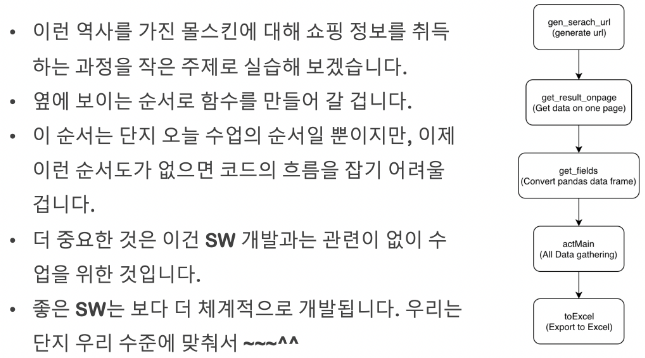

In [16]:
from PIL import Image
Image.open("../data/molskin plan.png")

## (1) gen_search_url()

- 레퍼런스 참고: https://developers.naver.com/docs/serviceapi/search/shopping/shopping.md#%EC%87%BC%ED%95%91-%EA%B2%80%EC%83%89-%EA%B2%B0%EA%B3%BC-%EC%A1%B0%ED%9A%8C

- 이 부분을 우리가 만들어 줄 것임
    - encText = urllib.parse.quote("몰스킨")
    - url = "https://openapi.naver.com/v1/search/shop?query=" + encText # JSON 결과 

In [17]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    #api_node: 어디에다 요청할건지 shop? blog?
    # start: 검색 시작 위치(기본값: 1, 최댓값: 1000)
    # display: 한번에 표시할 검색 결과 개수(기본값: 10, 최댓값: 100)
    # 한번에 최대 100개 표시할 수 있는데 1000개 표시하게 하고싶을때
    # display 값을 100으로 하고 start를 1 시작, 101 시작, 201 시작 ... 901시작하도록 10번하면 됨
    base = "https://openapi.naver.com/v1/search/"
    node = "/" + api_node + ".json" # xml형식으로 받고싶으면 그렇게 요청해도 됨
    param_query = "?query=" + urllib.parse.quote("몰스킨")
    param_start = "&start=" + str(start_num)
    # 레퍼런스에 start가 integer라고 명시되어있지만 "&start="와 연산해야하기 때문에 str로 바꿔줌
    param_disp = "&display=" + str(disp_num)

    return base + node + param_query + param_start + param_disp

In [18]:
gen_search_url("shop", "TEST", 10, 3)

'https://openapi.naver.com/v1/search//shop.json?query=%EB%AA%B0%EC%8A%A4%ED%82%A8&start=10&display=3'

## (2) get_result_onepage()

- dump :  python 객체를 json 파일로 변환
- dumps : python 객체를 json 문자열로 변환
- load : json 파일을 python 객체로 변환
- loads : json 문자열을 python 객체로 변환

-> 정리 : s가 안 붙어있으면 파일 관련, 붙어있으면 문자열 <-> 객체 사이 변환

    - python 객체 : dict, list, .... 
    - json은 하나하나가 문자열


In [19]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    # datetime.datetime.now(): 현재 시간
    # [%s]: %에 들어갈 내용이 datetime.datetime.now()임 format과 같은 것임
    return json.loads(response.read().decode("utf-8"))

In [20]:
datetime.datetime.now()

datetime.datetime(2023, 2, 1, 16, 9, 18, 332542)

In [21]:
url = gen_search_url("shop", "몰스킨", 1, 5)
one_result = get_result_onpage(url)

[2023-02-01 16:09:18.511483] Url Request Success


In [22]:
one_result
# 딕셔너리 형태. iems라는 키값에 접근해볼 것임

{'lastBuildDate': 'Wed, 01 Feb 2023 16:09:19 +0900',
 'total': 43124,
 'start': 1,
 'display': 5,
 'items': [{'title': '<b>몰스킨</b> 2023 다이어리 위클리 소프트커버',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=84662525433',
   'image': 'https://shopping-phinf.pstatic.net/main_8466252/84662525433.2.jpg',
   'lprice': '22950',
   'hprice': '',
   'mallName': '베스트펜',
   'productId': '84662525433',
   'productType': '2',
   'brand': '몰스킨',
   'maker': '',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '다이어리/플래너',
   'category4': '다이어리'},
  {'title': '<b>몰스킨</b> 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=82526953942',
   'image': 'https://shopping-phinf.pstatic.net/main_8252695/82526953942.7.jpg',
   'lprice': '24000',
   'hprice': '',
   'mallName': '베스트펜',
   'productId': '82526953942',
   'productType': '2',
   'brand': '몰스킨',
   'maker': '',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   '

In [23]:
one_result["items"]
# 리스트 형태임

[{'title': '<b>몰스킨</b> 2023 다이어리 위클리 소프트커버',
  'link': 'https://search.shopping.naver.com/gate.nhn?id=84662525433',
  'image': 'https://shopping-phinf.pstatic.net/main_8466252/84662525433.2.jpg',
  'lprice': '22950',
  'hprice': '',
  'mallName': '베스트펜',
  'productId': '84662525433',
  'productType': '2',
  'brand': '몰스킨',
  'maker': '',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '다이어리/플래너',
  'category4': '다이어리'},
 {'title': '<b>몰스킨</b> 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플',
  'link': 'https://search.shopping.naver.com/gate.nhn?id=82526953942',
  'image': 'https://shopping-phinf.pstatic.net/main_8252695/82526953942.7.jpg',
  'lprice': '24000',
  'hprice': '',
  'mallName': '베스트펜',
  'productId': '82526953942',
  'productType': '2',
  'brand': '몰스킨',
  'maker': '',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '노트/수첩',
  'category4': '노트'},
 {'title': '다니엘크레뮤 22FW 헤비 코튼 <b>몰스킨</b> 팬츠 3종',
  'link': 'https://search.shopping.naver.com/gate.nhn?id=3529777469

In [24]:
one_result["items"][0]

{'title': '<b>몰스킨</b> 2023 다이어리 위클리 소프트커버',
 'link': 'https://search.shopping.naver.com/gate.nhn?id=84662525433',
 'image': 'https://shopping-phinf.pstatic.net/main_8466252/84662525433.2.jpg',
 'lprice': '22950',
 'hprice': '',
 'mallName': '베스트펜',
 'productId': '84662525433',
 'productType': '2',
 'brand': '몰스킨',
 'maker': '',
 'category1': '생활/건강',
 'category2': '문구/사무용품',
 'category3': '다이어리/플래너',
 'category4': '다이어리'}

In [25]:
one_result["items"][0]["title"]

'<b>몰스킨</b> 2023 다이어리 위클리 소프트커버'

In [26]:
one_result["items"][0]["link"]

'https://search.shopping.naver.com/gate.nhn?id=84662525433'

In [27]:
one_result["items"][0]["lprice"]

'22950'

In [28]:
one_result["items"][0]["mallName"]

'베스트펜'

## (3) get_fields()

In [29]:
import pandas as pd

def get_fields(json_data):
    title = [each['title'] for each in json_data['items']]
    link= [each['link'] for each in json_data['items']]
    lprice = [each['lprice'] for each in json_data['items']]
    mallName = [each['mallName'] for each in json_data['items']]

    result_pd = pd.DataFrame({
        'title' : title,
        'link' : link,
        'lprice' : lprice,
        'mall' : mallName
        },  columns=['title', 'lprice', 'link', 'mall'])
    return result_pd

In [30]:
get_fields(one_result)

,title,lprice,link,mall
0,<b>몰스킨</b> 2023 다이어리 위클리 소프트커버,22950,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,<b>몰스킨</b> 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플,24000,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,다니엘크레뮤 22FW 헤비 코튼 <b>몰스킨</b> 팬츠 3종,91730,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,<b>몰스킨</b> 2023 데일리 12개월 다이어리 L,38050,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,<b>몰스킨</b> 2023다이어리 데일리 하드커버 라지블루 다이어리노트,31000,https://search.shopping.naver.com/gate.nhn?id=...,네이버


## (4) delete_tag()

In [31]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [32]:
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each['title']) for each in json_data['items']]
    link= [each['link'] for each in json_data['items']]
    lprice = [each['lprice'] for each in json_data['items']]
    mallName = [each['mallName'] for each in json_data['items']]

    result_pd = pd.DataFrame({
        'title' : title,
        'link' : link,
        'lprice' : lprice,
        'mall' : mallName
        },  columns=['title', 'lprice', 'link', 'mall'])
    return result_pd

In [33]:
get_fields(one_result)

,title,lprice,link,mall
0,몰스킨 2023 다이어리 위클리 소프트커버,22950,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,몰스킨 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플,24000,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,다니엘크레뮤 22FW 헤비 코튼 몰스킨 팬츠 3종,91730,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,몰스킨 2023 데일리 12개월 다이어리 L,38050,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,몰스킨 2023다이어리 데일리 하드커버 라지블루 다이어리노트,31000,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [34]:
url = gen_search_url("shop", "몰스킨", 1, 5)
json_result = get_result_onpage(url)
pd_result = get_fields(json_result)

[2023-02-01 16:09:19.199237] Url Request Success


In [35]:
pd_result

,title,lprice,link,mall
0,몰스킨 2023 다이어리 위클리 소프트커버,22950,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,몰스킨 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플,24000,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,다니엘크레뮤 22FW 헤비 코튼 몰스킨 팬츠 3종,91730,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,몰스킨 2023 데일리 12개월 다이어리 L,38050,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,몰스킨 2023다이어리 데일리 하드커버 라지블루 다이어리노트,31000,https://search.shopping.naver.com/gate.nhn?id=...,네이버


## actMain()

In [36]:
for n in range(1, 1000, 100):
    print(n)

1
101
201
301
401
501
601
701
801
901


In [37]:
result_mol = []

for n in range(1, 1000, 100):
    url = gen_search_url("shop", "몰스킨", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)

    result_mol.append(pd_result)

result_mol = pd.concat(result_mol)

[2023-02-01 16:09:19.600604] Url Request Success
[2023-02-01 16:09:19.850283] Url Request Success
[2023-02-01 16:09:20.111905] Url Request Success
[2023-02-01 16:09:20.408993] Url Request Success
[2023-02-01 16:09:20.717453] Url Request Success
[2023-02-01 16:09:20.992399] Url Request Success
[2023-02-01 16:09:21.280628] Url Request Success
[2023-02-01 16:09:21.549908] Url Request Success
[2023-02-01 16:09:21.797305] Url Request Success
[2023-02-01 16:09:22.124310] Url Request Success


In [38]:
result_mol.info()
# 데이터는 1000개인데 index가 0-99임

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [39]:
result_mol.reset_index()

,index,title,lprice,link,mall
0,0,몰스킨 2023 다이어리 위클리 소프트커버,22950,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,1,몰스킨 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플,24000,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,2,다니엘크레뮤 22FW 헤비 코튼 몰스킨 팬츠 3종,91730,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,3,몰스킨 2023 데일리 12개월 다이어리 L,38050,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,4,몰스킨 2023다이어리 데일리 하드커버 라지블루 다이어리노트,31000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...,...
995,95,인디안 고급 몰스킨 워싱 캐주얼자켓 MIPFAYF9101NBC,158200,https://search.shopping.naver.com/gate.nhn?id=...,네이버
996,96,인디안 몰스킨 워싱 솔리드 점퍼 부천점 MIWCLYF8111BC,173060,https://search.shopping.naver.com/gate.nhn?id=...,네이버
997,97,갤럭시 갤럭시 몰스킨 다잉 팬츠 GA1821U22P,116660,https://search.shopping.naver.com/gate.nhn?id=...,네이버
998,98,몰스킨 Moleskine 클래식 2023 데일리 플래너 하드 커버 라지 12 x 스칼렛,29800,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [40]:
result_mol.reset_index(drop=True, inplace=True)
result_mol

,title,lprice,link,mall
0,몰스킨 2023 다이어리 위클리 소프트커버,22950,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
1,몰스킨 노트 가죽 하드커버 감성 고급 업무용 이쁜 심플,24000,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
2,다니엘크레뮤 22FW 헤비 코튼 몰스킨 팬츠 3종,91730,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,몰스킨 2023 데일리 12개월 다이어리 L,38050,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,몰스킨 2023다이어리 데일리 하드커버 라지블루 다이어리노트,31000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...
995,인디안 고급 몰스킨 워싱 캐주얼자켓 MIPFAYF9101NBC,158200,https://search.shopping.naver.com/gate.nhn?id=...,네이버
996,인디안 몰스킨 워싱 솔리드 점퍼 부천점 MIWCLYF8111BC,173060,https://search.shopping.naver.com/gate.nhn?id=...,네이버
997,갤럭시 갤럭시 몰스킨 다잉 팬츠 GA1821U22P,116660,https://search.shopping.naver.com/gate.nhn?id=...,네이버
998,몰스킨 Moleskine 클래식 2023 데일리 플래너 하드 커버 라지 12 x 스칼렛,29800,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [41]:
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [42]:
result_mol['lprice'] = result_mol['lprice'].astype('float')
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   link    1000 non-null   object 
 3   mall    1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


## (5) to_excel()

In [43]:
#!pip install xlsxwriter

In [44]:
# 엑셀 작업을 파이썬으로 하는 것임
writer = pd.ExcelWriter('../data/06_molskin_diary_innaver_shop.xlsx', engine='xlsxwriter')
result_mol.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 4)
worksheet.set_column('B:B', 60) # 셀 크기가 60
worksheet.set_column('C:C', 10)
worksheet.set_column('D:D', 10)
worksheet.set_column('E:E', 50)
worksheet.set_column('F:F', 10)

worksheet.conditional_format('C2:C1001', {'type':'3_color_scale'}) # 가격 크기에 따라 색깔을 다르게
writer.save()

C:\Users\TAEN\AppData\Local\Temp\ipykernel_15336\623367242.py:15: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## (6) 시각화

In [45]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: D60B-74CD

 c:\Users\TAEN\Documents\ds_study\source_code ���͸�

2023-02-01  ���� 04:06    <DIR>          .
2023-02-01  ���� 04:06    <DIR>          ..
2023-01-27  ���� 03:51    <DIR>          .ipynb_checkpoints
2023-02-01  ���� 04:09    <DIR>          __pycache__
2023-01-27  ���� 04:33           990,622 01.Analysis Seoul CCTV.ipynb
2023-01-30  ���� 07:57         5,206,212 02. Analysis Seoul Crime.ipynb
2023-01-27  ���� 04:33         1,720,988 03. Web Data.ipynb
2023-01-30  ���� 09:39           423,148 04. Self Oil Station Price Analysis.ipynb
2023-02-01  ���� 04:08         5,234,618 05. forecast.ipynb
2023-02-01  ���� 04:07           380,408 06. Naver ApI.ipynb
2023-02-01  ���� 11:15               950 drawSinWave.py
2023-01-20  ���� 02:33             3,032 folium.html
2022-12-15  ���� 03:05             1,280 naver.py
2023-01-25  ���� 08:48             5,284 naverfinance.xlsx
2023-02-01  ���� 04:06               533 set_matplotlib_hangu

In [46]:
import set_matplotlib_hangul
import seaborn as sns
import matplotlib.pyplot as plt

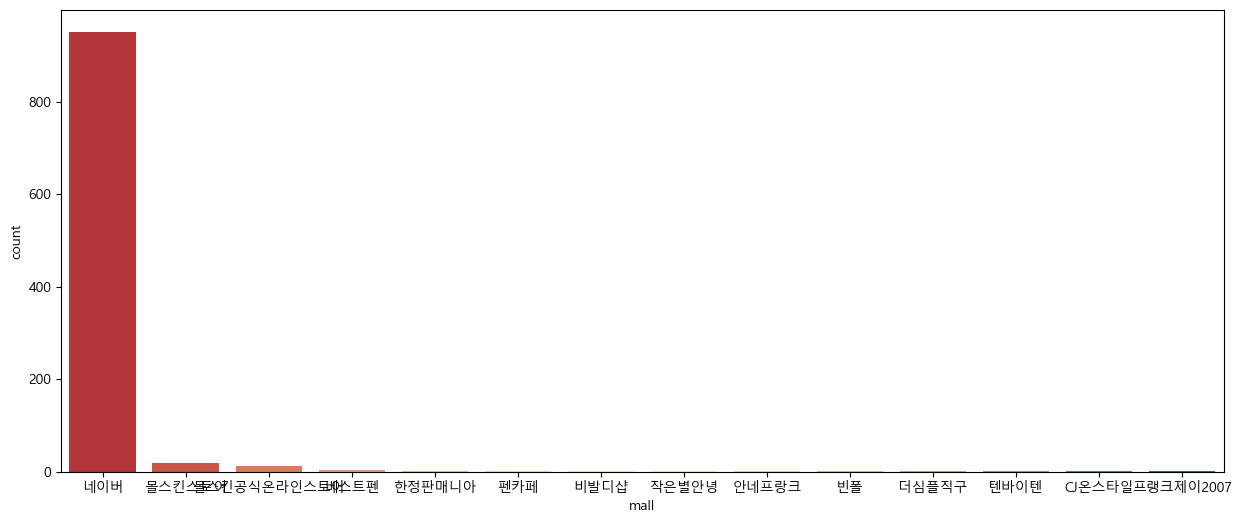

In [49]:
plt.figure(figsize=(15, 6))
sns.countplot(
    x = result_mol["mall"], # x = 안붙였더니 선생님꺼는 되는데 나는 오류남
    data = result_mol, 
    palette="RdYlGn",
    order=result_mol["mall"].value_counts().index
)

plt.show()

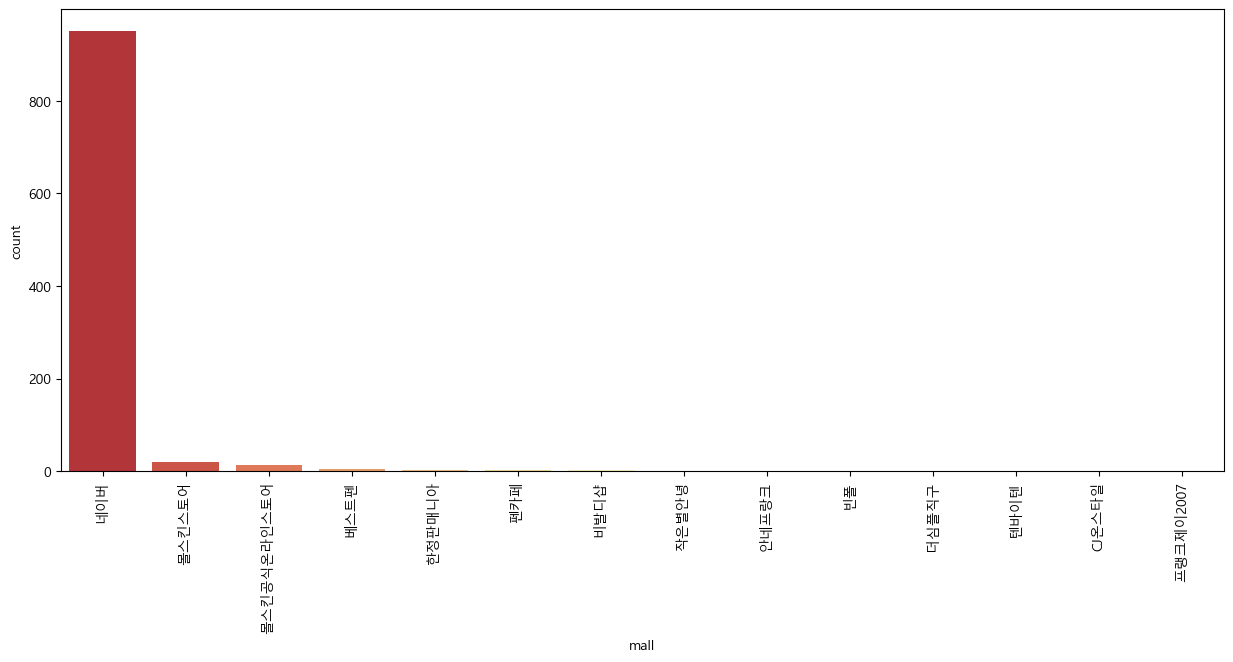

In [50]:
plt.figure(figsize=(15, 6))
sns.countplot(
    x = result_mol["mall"], # x = 안붙였더니 선생님꺼는 되는데 나는 오류남
    data = result_mol, 
    palette="RdYlGn",
    order=result_mol["mall"].value_counts().index
)
plt.xticks(rotation=90) #이름들이 세워지지 않게 하기 위해서.
plt.show()